# Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place your ID ("numero di matricola") that will be used as seed for random generator. You can try to change the seed to see the impact of the randomization.

In [3]:
ID = 1211201
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
# rescale the data
X = X / 255.0

Now split into training and test. Make sure that each label is present at least 10 times
in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [44 50 45 57 39 53 50 51 66 45]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


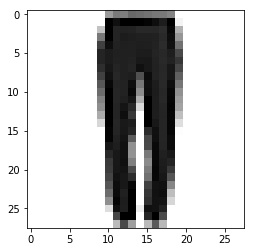

LABEL: 1
INPUT:


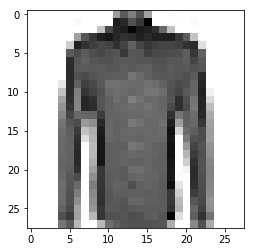

LABEL: 6
INPUT:


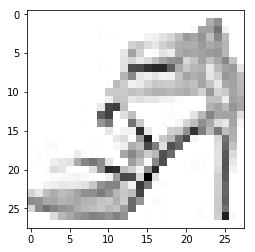

LABEL: 5


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a Feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using the GridSearchCV with cv=5.


In [8]:
parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#ADD YOUR CODE
clf = GridSearchCV(estimator=mlp, param_grid=parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)
print ('RESULTS FOR NN\n')

print("Best parameters set found:", clf.best_params_)
#ADD YOUR CODE

print("Score with best parameters:", clf.best_score_)
#ADD YOUR CODE

print("\nAll scores on the grid:")
#ADD YOUR CODE
results = pd.DataFrame(clf.cv_results_)

/home/guida/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (50,)}
Score with best parameters: 0.662

All scores on the grid:


In [9]:
results[["param_hidden_layer_sizes","mean_test_score"]]

,param_hidden_layer_sizes,mean_test_score
0,"(10,)",0.556
1,"(50,)",0.662
2,"(10, 10)",0.378
3,"(50, 50)",0.586


### QUESTION 1

What do you observe for different architectures and their scores? How the nummber of layers and their sizes affect the performances?

- In this case we can see that an increase in performance is not always guaranteed by increasing the number of layers.

### TO DO 2

Now get training and test error for a NN with best parameters from above. Use verbose=True
in input so to see how loss changes in iterations

In [10]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
best_model_S = MLPClassifier(hidden_layer_sizes=(50),verbose=True,max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

best_model_S.fit(X_train, y_train)

training_error = 1. - best_model_S.score(X_train,y_train) #ADD YOUR CODE
test_error = 1. - best_model_S.score(X_test,y_test) #ADD YOUR CODE

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.20764298
Iteration 2, loss = 1.61008434
Iteration 3, loss = 1.05507283
Iteration 4, loss = 1.03521125
Iteration 5, loss = 0.96211263
Iteration 6, loss = 0.79958095
Iteration 7, loss = 0.62700522
Iteration 8, loss = 0.57016473
Iteration 9, loss = 0.48843773
Iteration 10, loss = 0.44054397
Iteration 11, loss = 0.41645295
Iteration 12, loss = 0.48896357
Iteration 13, loss = 0.35863190
Iteration 14, loss = 0.30592336
Iteration 15, loss = 0.30057636
Iteration 16, loss = 0.29025680
Iteration 17, loss = 0.31775313
Iteration 18, loss = 0.22236340
Iteration 19, loss = 0.22155019
Iteration 20, loss = 0.27381405
Iteration 21, loss = 0.16369681
Iteration 22, loss = 0.15393684
Iteration 23, loss = 0.13306830
Iteration 24, loss = 0.15178738
Iteration 25, loss = 0.15162890
Iteration 26, loss = 0.12080657
Iteration 27, loss = 0.10109650
Iteration 28, loss = 0.26585800
Iteration 29, loss = 0.09158831
Iteration 30, loss = 0.08764913
Iteration 31, loss = 0.07626175
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [11]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 976,  989, 1020,  994, 1037,  990, 1000, 1025, 1036,  933]))

## TO DO 3

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [ ]:
#for NN we try the same architectures as before
parameters = {'hidden_layer_sizes': [(10,),(50,),(100,),(200,),(50,50,),(100,100),(100,100,100)]}

#ADD YOUR CODE
best_mlp_large = MLPClassifier(max_iter=200, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

#ADD YOUR CODE
mlp_large_CV = GridSearchCV(best_mlp_large, parameters, cv=5,return_train_score=True) # 5-fold-cross-validation
mlp_large_CV.fit(X_train, y_train)
print ('\nRESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_large_CV.best_params_)

print("Score with best parameters:")
print(mlp_large_CV.best_score_)

In [ ]:
print("\nAll scores on the grid:")
results_large = pd.DataFrame(mlp_large_CV.cv_results_)
results_large[["param_hidden_layer_sizes", "mean_test_score"]]


All scores on the grid:


,param_hidden_layer_sizes,mean_test_score
0,"(10,)",0.7053
1,"(50,)",0.8202
2,"(100,)",0.7965
3,"(200,)",0.8500
4,"(50, 50)",0.7856
5,"(100, 100)",0.6330
6,"(100, 100, 100)",0.6706


## QUESTION 2
Describe your architecture choices and the results you observe with respect to the layers and sizes used.

- Architecture choice: I decided to increase the neurons for the single layer looking at the results of the previous cells. Furthermore, the neurons for multilayer have been increased to see if they continue to have worse performance.
- Results: we know that the number of layer is problem-dipendent. <br> A better performance for the single layer seems to be confirmed. The best performance of (200,) is probably determined by the fact that increasing the number of neurons (parameters) increases the approximation power.

## TO DO 4

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations. 


In [ ]:
%%time
#get training and test error for the best NN model from CV

#ADD YOUR CODE
best_model_XL = MLPClassifier(hidden_layer_sizes=(200,), max_iter=200, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)
best_model_XL.fit(X_train, y_train)

training_error = 1. - best_model_XL.score(X_train,y_train) #ADD YOUR CODE
test_error = 1. - best_model_XL.score(X_test,y_test) #ADD YOUR CODE

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.133220
CPU times: user 1min 11s, sys: 2.83 s, total: 1min 14s
Wall time: 37.1 s


## QUESTION 3

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

- Bigger training set probably contributes to the reduction of the error on the test set.
- The fact that both models give a training error near zero allows us to say that maybe we are in a case of overfitting. 

### TO DO 5

Plot a digit that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

Clothing missclassified by 500 and correctly by 10000:  6406 / 50000
NN with m=500 prediction = 6
 NN with m=10000 prediction = 2
INPUT:


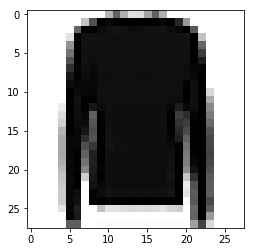

LABEL: 2


In [ ]:
NN_prediction = best_model_S.predict(X_test) #ADD YOUR CODE
large_NN_prediction = best_model_XL.predict(X_test) #ADD YOUR CODE

missclassified_index = []
for i in range(len(y_test)):
    if (large_NN_prediction[i] == y_test[i]) and (NN_prediction[i] != y_test[i]):
        missclassified_index.append(i)

j = missclassified_index[np.random.randint(0, len(missclassified_index))]
print("Clothing missclassified by 500 and correctly by 10000: ",len(missclassified_index),"/",len(y_test))
print("NN with m=500 prediction =", NN_prediction[j])
print(" NN with m=10000 prediction =", large_NN_prediction[j])
plot_input(X_test,y_test,j)
#ADD YOUR CODE
        

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 50000 data points. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large" , you could need to replace with your variable names.



Weights with 500 data points:


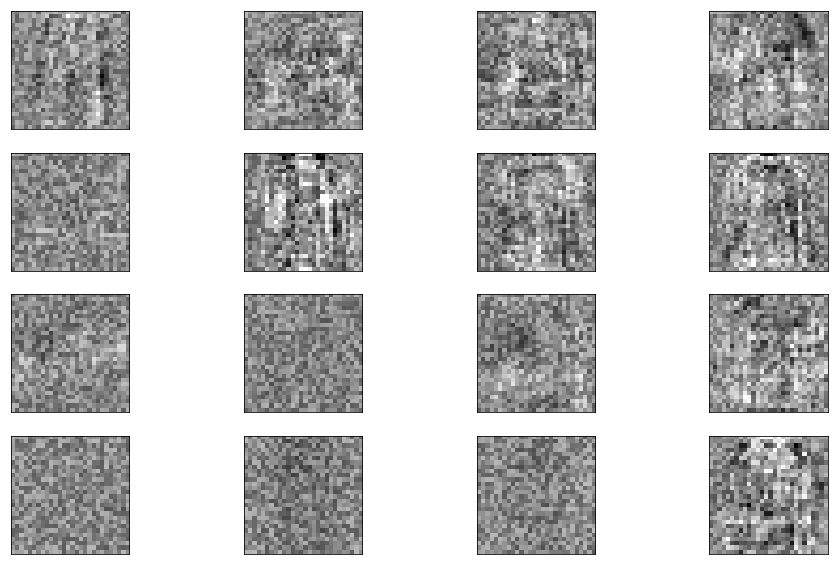

Weights with 10000 data points:


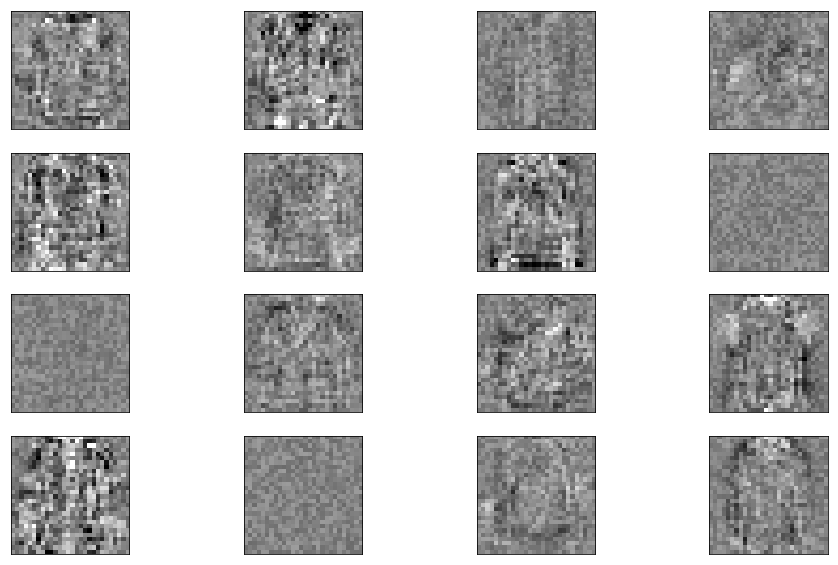

In [ ]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
fig.set_size_inches(16.0, 10.0)
vmin, vmax = best_model_S.coefs_[0].min(), best_model_S.coefs_[0].max()
for coef, ax in zip(best_model_S.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
fig.set_size_inches(16.0, 10.0)
vmin, vmax = best_model_XL.coefs_[0].min(), best_model_XL.coefs_[0].max()
for coef, ax in zip(best_model_XL.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 4

Describe what do you observe by looking at the weights
 
- In the case of the larger dataset we see that the shapes of the clothes are better defined and we have less noise

### TO DO 7

Report the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores.

In [ ]:
%%time
m_training = 10000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# best parameters found in the SVM notebook
# Create the SVM and perform the fit

#ADD YOUR CODE
best_SVM = SVC(C=10, gamma=0.001, kernel='rbf')
best_SVM.fit(X_train, y_train)
print ('RESULTS FOR SVM')

SVM_training_error = 1. - best_SVM.score(X_train,y_train) #ADD YOUR CODE

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1. - best_SVM.score(X_test,y_test) #ADD YOUR CODE
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM


## QUESTION 5
Compare the results of SVM and of NN. Which one would you preferer? Which are its tradeoffs?

- As you can see in the corresponding cells the process is faster in the case of the NN, also the result on the test error seems better. 
- I don't seem to have clear reasons in order to prefer a solution in general. In the case of this problem, if everything has been executed correctly it seems to me that the NN is more performing.